<a href="https://colab.research.google.com/github/amirmohammadkalateh/fmnist_data/blob/main/fmnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

keras.__version__


'3.8.0'

In [ ]:
fmnist_data = keras.datasets.fashion_mnist
fmnist_data.load_data()
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
print(y_train[0:10])
print(x_train[0:10])

[9 0 0 3 0 2 7 2 5 5]
[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ... 180   0   0]
  [  0   0   0 ...  72   0   0]
  [  0   0   0 ...  70   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...  39   1   0]
  ...
  [  0   0   0 ... 238   0   0]
  [  0   0   0 ... 131   0   0]
  [  0

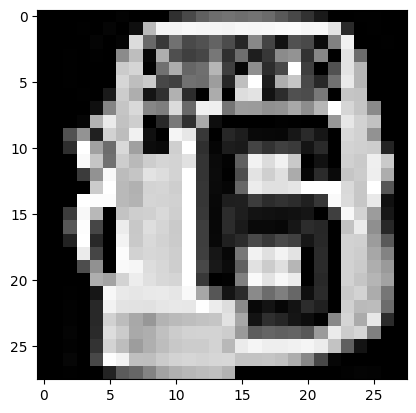

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[6000,] , cmap="gray")

In [ ]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [ ]:
#the first mode
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#The second mode
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")

])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers
weights , bias =model.layers[1].get_weights()

In [ ]:
#compile
#Configures the model for training.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])


In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6236 - loss: 1.1444 - val_accuracy: 0.8002 - val_loss: 0.5642
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8149 - loss: 0.5334 - val_accuracy: 0.8248 - val_loss: 0.4966
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8344 - loss: 0.4753 - val_accuracy: 0.8411 - val_loss: 0.4524
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8467 - loss: 0.4408 - val_accuracy: 0.8450 - val_loss: 0.4360
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8520 - loss: 0.4244 - val_accuracy: 0.8474 - val_loss: 0.4354
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8575 - loss: 0.4072 - val_accuracy: 0.8561 - val_loss: 0.4133
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8634 - loss: 0.3928 - val_accuracy: 0.8616 - val_loss: 0.3948
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8699 - loss: 0.3745 -

In [ ]:
print(history.history)

{'accuracy': [0.7342941164970398, 0.8209607601165771, 0.8359608054161072, 0.8460000157356262, 0.8532353043556213, 0.8583137392997742, 0.8635097742080688, 0.8662353157997131, 0.8701568841934204, 0.8729411959648132, 0.8754901885986328, 0.877823531627655, 0.8800588250160217, 0.8823137283325195, 0.8835686445236206, 0.886451005935669, 0.8876078724861145, 0.8909019827842712, 0.8912941217422485, 0.8925686478614807, 0.8944313526153564, 0.8951960802078247, 0.8988627195358276, 0.8998235464096069, 0.8986274600028992, 0.9011372327804565, 0.9028627276420593, 0.9033529162406921, 0.9044901728630066, 0.9079999923706055, 0.9080784320831299, 0.9089411497116089, 0.9099215865135193, 0.9104902148246765, 0.9102941155433655, 0.9128627181053162, 0.914078414440155, 0.9154313802719116, 0.9163137078285217, 0.9155490398406982, 0.9177255034446716, 0.9179019331932068, 0.9186078310012817, 0.9197254776954651, 0.9209607839584351, 0.9214313626289368, 0.9227451086044312, 0.9238235354423523, 0.9249804019927979, 0.9258038

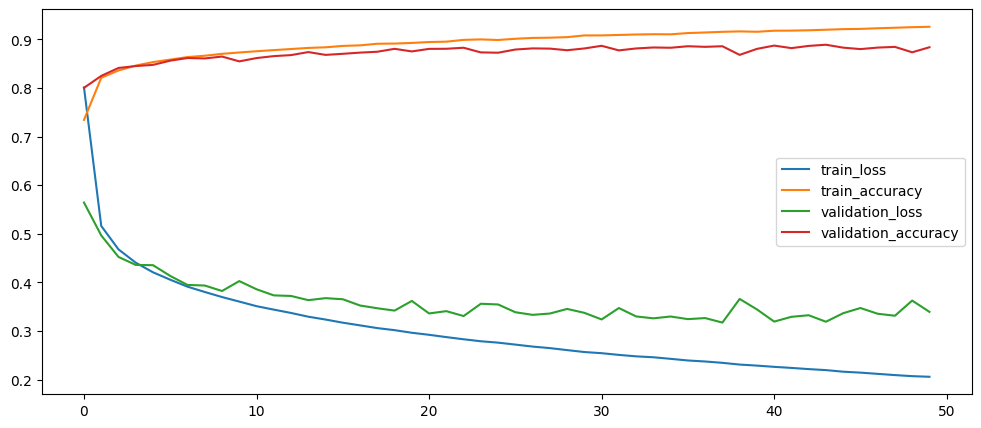

In [ ]:
fig , ax = plt.subplots(figsize = (12,5))
ax.plot(history.history["loss"] , label="train_loss")
ax.plot(history.history["accuracy"] , label = "train_accuracy")
ax.plot(history.history["val_loss"] , label= "validation_loss")
ax.plot(history.history["val_accuracy"], label = "validation_accuracy")
ax.legend()

In [ ]:
model.evaluate(x_test, y_test, verbose=0)

[0.35438302159309387, 0.8799999952316284]

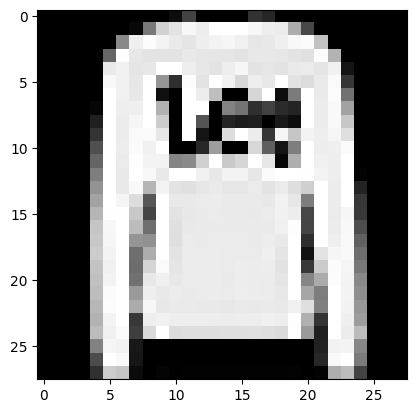

In [ ]:
z = x_test[1:3:,:,:]
z.shape
plt.imshow(z[0,:,:], cmap="gray")

In [ ]:
model.predict(z)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[6.7580427e-06, 1.2147636e-08, 9.9584323e-01, 1.1969322e-08,
        3.7991505e-03, 9.2835301e-10, 3.5078442e-04, 5.6842971e-11,
        2.0886519e-08, 2.4202365e-12],
       [1.1277862e-06, 9.9999452e-01, 3.9547601e-08, 1.9961331e-06,
        2.2937804e-06, 3.5357244e-16, 7.8902023e-09, 4.1146665e-13,
        2.5513986e-08, 2.2634165e-12]], dtype=float32)

In [ ]:
import numpy as np
np.argmax(model.predict(z))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


11